In [215]:
### Developer - Laltu Gazi, SINP

### The problem is: How will you tell a dice is biased in a toss of 100 trials. 

from scipy.stats import chi2
import numpy as np 
from scipy import stats
from scipy.special import comb
import matplotlib.pyplot as plt
observed_heads = 46
H_0 = np.array([.5,.3,.7,.8,.6]) ### each array element corresponds to the probability of getting heads at the same time on n coins 
H_1 = .46
number_of_trials = 100
number_exp = 10000
number_of_heads = np.array([np.random.binomial(number_of_trials, p, number_exp) for p in H_0])  ### number of heads/success

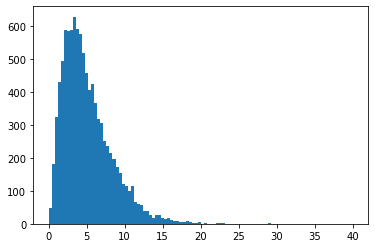

In [216]:
L_01 = comb(number_of_trials,number_of_heads)*H_0[:, np.newaxis]**number_of_heads*(1-H_0[:, np.newaxis])**(number_of_trials-number_of_heads)   
H_prof = number_of_heads/number_of_trials
L_1 = comb(number_of_trials,number_of_heads)*(H_prof**number_of_heads)*(1-H_prof)**(number_of_trials-number_of_heads)
prod_of_L_0 =np.prod(L_01, axis=0)
prod_of_L_1= np.prod(L_1, axis=0)
λ_μ = prod_of_L_0/prod_of_L_1
t_μ = -2*np.log(λ_μ)
plt.hist(t_μ, bins=100,range = (0,40))
plt.show()

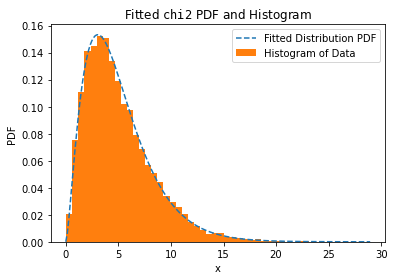

  params: FitParams(df=5.040615740393727, loc=0.0, scale=1.0)
 success: True
 message: 'Optimization terminated successfully.'


In [217]:
dist = stats.chi2
bounds = [(0,320)]
res = stats.fit(dist, t_μ, bounds)
res.plot()
plt.show()
print(res)